In [11]:
import os
os.getcwd()

'/home/matthew/anaconda3/envs/insight/staycationLA/data/raw'

In [12]:
os.chdir('/home/matthew/anaconda3/envs/insight/staycationLA/notebooks')
os.getcwd()

'/home/matthew/anaconda3/envs/insight/staycationLA/notebooks'

In [2]:
#modified from 
#https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
#https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

In [3]:
#pip install plotly

In [4]:
# Import packages

import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

In [6]:
import glob
import os
import pandas as pd

In [8]:
def positive_review_string(reviews):
    #set rating to be 4-5 stars only
    reviews = reviews[reviews['stars'] > 35]
    reviews["all_text"] = reviews["title"] + " " + reviews["text"]
    #make into list
    reviews_texts = reviews['all_text'].tolist()
    #type(reviews_texts_pos)

    #make into string
    # initialize an empty string 
    str1 = " " 
    # return string   
    reviews=(str1.join(reviews_texts)) 
    return(reviews)

In [93]:
namelist= ['phuket', 'santorini', 'cusco', 'sydney', 'istanbul', 'florence', 'cape_town', 'havana', 'jaipur', 'luxor', 'marrakech', 'rio', 'salzburg', "beijing", "st_petersburg", 'edinburgh', 'lisbon', 'berlin']
numlist= [103, 163, 108, 122, 293, 281, 107, 126, 113, 172, 166, 91, 73, 149, 116, 163, 117, 162]

In [178]:
li = []
for name, num in zip(namelist, numlist):
    raw= pd.read_csv("../data/raw/city_" + name + ".csv", names=['stars', 'title', 'text'])
    #../../../ each ../ goes up one folder level

    #remove reviews that are not in english
    english=raw[0:num]
    english['city']= name
    english = english.drop_duplicates()
    english["all_text"] = english["title"] + " " + english["text"]
    reviews = english[english['stars'] > 35]
    li.append(reviews)

    
    
    appended_data = pd.concat(li)
    data2=appended_data.reset_index(drop=True)

<ipython-input-178-e607a0ee0001>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
data2

,stars,title,text,city,all_text
0,50,“A must see!”,When I was here last November it was raining c...,phuket,“A must see!” When I was here last November it...
1,50,“INDIE Bric a Brac accessories for unisex”,"Indie Bric a Brac and accessories shop, is lik...",phuket,“INDIE Bric a Brac accessories for unisex” Ind...
2,50,“Driving in Phuket”,Phuket is best viewed through the car window. ...,phuket,“Driving in Phuket” Phuket is best viewed thro...
3,50,“phuket scooter hire”,hi to all members well just got back from phuk...,phuket,“phuket scooter hire” hi to all members well j...
4,40,“Phuket taxi and cost”,To make stay more pleasant and not singled out...,phuket,“Phuket taxi and cost” To make stay more pleas...
...,...,...,...,...,...
2118,40,“Berlin is a city you must visit”,We spent about 4 days in December 2005 in Berl...,berlin,“Berlin is a city you must visit” We spent abo...
2119,40,“Simply brilliant”,"Just returned from Berlin, Germany and quite f...",berlin,"“Simply brilliant” Just returned from Berlin, ..."
2120,50,“Great City”,"Hotel (Winters Hotel, Berlin) adequate. Room c...",berlin,"“Great City” Hotel (Winters Hotel, Berlin) ade..."
2121,50,“AWESOME!!!!!”,Superb beer and bars! Go take a tour of Sans S...,berlin,“AWESOME!!!!!” Superb beer and bars! Go take a...


In [182]:
df=data2.drop(['title', 'text', 'stars'], axis=1)
df

,city,all_text
0,phuket,“A must see!” When I was here last November it...
1,phuket,“INDIE Bric a Brac accessories for unisex” Ind...
2,phuket,“Driving in Phuket” Phuket is best viewed thro...
3,phuket,“phuket scooter hire” hi to all members well j...
4,phuket,“Phuket taxi and cost” To make stay more pleas...
...,...,...
2118,berlin,“Berlin is a city you must visit” We spent abo...
2119,berlin,"“Simply brilliant” Just returned from Berlin, ..."
2120,berlin,"“Great City” Hotel (Winters Hotel, Berlin) ade..."
2121,berlin,“AWESOME!!!!!” Superb beer and bars! Go take a...


In [21]:
#reviews_pos

In [215]:
#import spacy
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.replace('“', '').replace('”', '').replace('"', '') 
    text = text.replace(',', ' ').replace('’', ' ')
    return text

df_clean = pd.DataFrame(df.all_text.apply(lambda x: clean_text(x)))
df_clean.tail(10)

In [286]:
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)


df_clean["question_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['all_text']), axis=1)
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')

In [287]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df_clean.english = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                       if w.lower() in words or not w.isalpha()) 
                       for x in df_clean.question_lemmatize_clean]
df_clean.head(5)

[nltk_data] Downloading package words to /home/matthew/nltk_data...
[nltk_data]   Package words is already up-to-date!


                                               all_text  \
0     a must see  when i was here last november it w...   
1     indie bric a brac accessories for unisex indie...   
2     driving in phuket phuket is best viewed throug...   
3     phuket scooter hire hi to all members well jus...   
4     phuket taxi and cost to make stay more pleasan...   
...                                                 ...   
2118  berlin is a city you must visit we spent about...   
2119  simply brilliant just returned from berlin  ge...   
2120  great city hotel  winters hotel  berlin  adequ...   
2121  awesome      superb beer and bars  go take a t...   
2122  a city full of interest a city where past and ...   

                                     question_lemmatize  \
0     a must see   when i be here last november -PRO...   
1     indie bric a brac accessory for unisex indie b...   
2     drive in phuket phuket be best view through th...   
3     phuket scooter hire hi to all member well just...

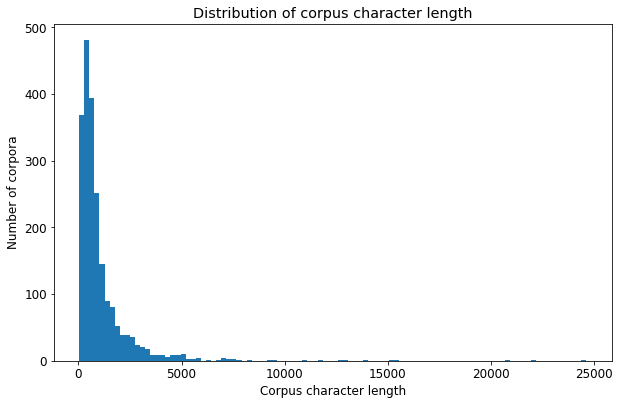

In [290]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.english]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of corpus character length')
plt.ylabel('Number of corpora')
plt.xlabel('Corpus character length')
#sns.despine()
plt.show()

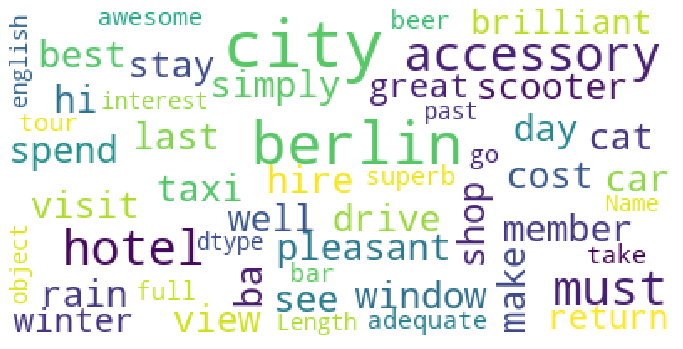

In [291]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_clean['english']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [293]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['english'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [294]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english', max_df = 0.12).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['english'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [109]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_clean['question_lemmatize_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [110]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_clean['question_lemmatize_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

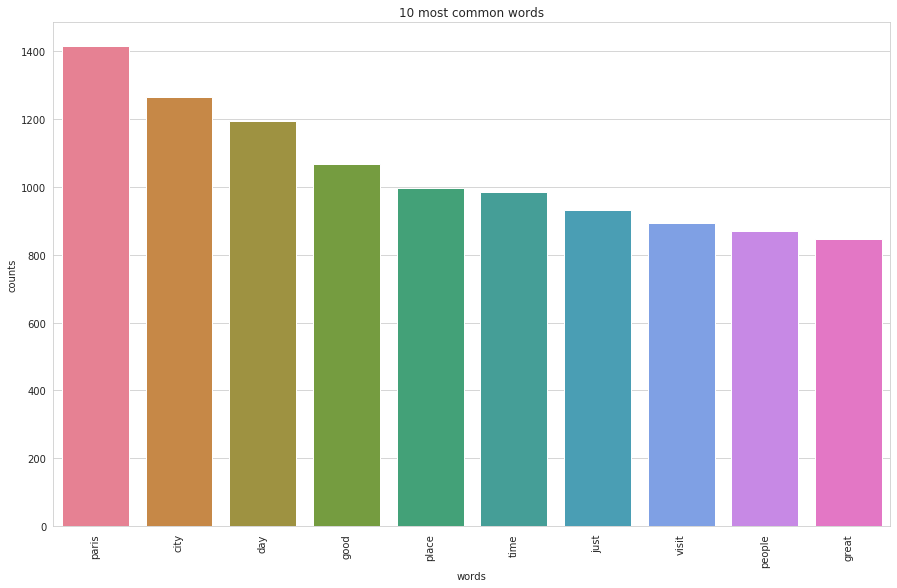

In [33]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
        
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_clean['question_lemmatize_clean'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [45]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
sydney city day great tour walk good harbour time place opera house ferry bus visit

Topic #1:
paris city day time good just place people visit hotel walk great istanbul trip like

Topic #2:
field daytrip leaf sanctuary thrilling destroy jungle dad carryon moneythe overseas higher achieve insect pacific

Topic #3:
cusco peru day trip place good city tour inca great time guide visit hotel picchu

Topic #4:
santorini island place view good beautiful stay fira day hotel visit beach just oia town


In [42]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

IndentationError: expected an indented block (<unknown>, line 8)

In [322]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
stopWords = ['phuket', 'santorini', 'cusco', 'sydney', 'istanbul', 'florence', 'cape', 'town', 'havana', 'jaipur', 'luxor', 'marrakech', 'rio', 'salzburg', "beijing", "st", "petersburg", 'edinburgh', 'lisbon', 'berlin', "capetown", "www", "com", "lisboa", "lira", "hagia", "sophia", "baht", "phi", "yuan", "maria", "hermitage"] + list(esw) 

In [323]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5,                       
                             stop_words=stopWords,             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=1500, 
                             max_df = 0.15                         )

data_vectorized = vectorizer.fit_transform(df_clean['english'])


In [324]:
lda_model = LatentDirichletAllocation(n_components=25, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -31.058315  29.500683       1        1  34.233669
13    -21.461353 -17.436399       2        1  12.436564
14     -6.096575 -39.141697       3        1  10.579321
22     56.071609  -9.400822       4        1   5.632618
16     61.351185 -56.833744       5        1   5.168405
11     17.821402  57.413609       6        1   3.725850
12     49.250862  50.355305       7        1   3.701742
10    -13.172927  53.618752       8        1   3.363451
1      31.702734 -64.520691       9        1   3.141858
6      14.361623   7.507676      10        1   2.906952
24     29.184048 -13.613249      11        1   2.217960
20     19.284979 -39.023891      12        1   2.173062
15      4.356016 -15.153996      13        1   1.716819
7     -12.708655   6.676149      14        1   1.693611
18    -46.884609 -28.260098      15        1   1.656929
3     -28.764826 -54.799591      16        1   1.276658
0      62.600399  25.238491      17        1   1.112142
23    -43.313934   3.224185      18        1   0.999072
21     44.929001 -34.219784      19        1   0.941482
5      81.611572   3.921941      20        1   0.469415
17      0.798218  29.447706      21        1   0.286006
19      2.051419 -67.215591      22        1   0.228293
8      27.693497  31.413803      23        1   0.174346
9      40.470249   9.942824      24        1   0.091111
2      76.766655 -28.811687      25        1   0.072666, topic_info=            Term       Freq       Total Category  logprob  loglift
118        beach  615.00000  615.000000  Default  30.0000  30.0000
926       palace  529.00000  529.000000  Default  29.0000  29.0000
198          car  381.00000  381.000000  Default  28.0000  28.0000
40       airport  355.00000  355.000000  Default  27.0000  27.0000
700       island  476.00000  476.000000  Default  26.0000  26.0000
...          ...        ...         ...      ...      ...      ...
131         bell    0.05368   24.801577  Topic25  -7.3128   1.0914
598        group    0.05368  215.085866  Topic25  -7.3128  -1.0687
681   incredibly    0.05368   29.732961  Topic25  -7.3128   0.9101
1309     suppose    0.05368   27.352456  Topic25  -7.3128   0.9935
26        advice    0.05368  115.823773  Topic25  -7.3128  -0.4497

[1281 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.058792   able
0         2  0.251202   able
0         3  0.187065   able
0         4  0.122929   able
0         5  0.080171   able
...     ...       ...    ...
1497     14  0.021961  young
1499      1  0.292995    zoo
1499      4  0.559354    zoo
1499      6  0.133180    zoo
1499      9  0.013318    zoo

[3667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 14, 15, 23, 17, 12, 13, 11, 2, 7, 25, 21, 16, 8, 19, 4, 1, 24, 22, 6, 18, 20, 9, 10, 3])

In [325]:
import numpy as np
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,sight,perfect,year,accommodation,live,recently,dream,traveller,wish,incredible,truly,insider,meet,life,destination,holiday,color,magical,walking,unbelievable
Topic 1,fantastic,holiday,week,staff,different,fun,eat,clean,service,weather,bar,choice,beach,cheap,favorite,highly,big,mountain,discover,shopping
Topic 2,reasonable,right,switch,don,massage,hustle,dining,boy,fare,german,free,wish,bridge,card,compare,splendid,jewelry,alleyway,fear,king
Topic 3,interesting,cool,horse,hop,facility,toilet,sure,awesome,loaf,disappoint,access,seat,water,book,august,long,fun,site,country,adventure
Topic 4,main,think,long,don,away,stop,square,eat,minute,quite,road,bit,end,small,leave,cheap,offer,close,taxi,buy
Topic 5,visa,agency,car,child,rental,certainly,easy,worker,knowledge,highly,comment,thoroughly,arrive,line,ready,number,recently,culture,suit,possibly
Topic 6,palace,castle,modern,fort,architecture,capital,building,monument,culture,russia,century,pink,art,beauty,east,historic,build,visitor,past,ancient
Topic 7,island,explore,fabulous,wine,blue,point,sunset,red,definitely,volcano,boat,small,wind,hot,begin,romantic,volcanic,fun,bit,weather
Topic 8,international,member,delight,pound,hire,bike,problem,resort,fine,juice,rich,spot,office,police,post,picture,charge,bad,drive,safe
Topic 9,township,beer,small,elephant,fantastic,chocolate,quay,island,short,near,exhibit,harbour,revolution,circular,ride,ask,water,hot,offer,boat


In [326]:
Topics_theme = ['sightseeing', 'service', 'market', 'outdoor activity', 'streets', 'car rental', 'architecture', 'island/wine',
                'international', 'food/busy', 'shopping', 'public structures', 'royal', 'logistics', 'friends/company', 
                'beach/bar/island', 'transport', 'amazing', 'mediterranean', 'bay/photo', 
                'temple', 'airport', 'outdoor structures', 'wedding/celebration', 'palace/church']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,international,food/busy,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
Word 0,sight,fantastic,reasonable,interesting,main,visa,palace,island,international,township,...,beach,taxi,wow,wine,bay,temple,airport,house,wedding,mosque
Word 1,perfect,holiday,right,cool,think,agency,castle,explore,member,beer,...,bar,driver,feeling,donkey,tourism,west,service,mountain,festival,palace
Word 2,year,week,switch,horse,long,car,modern,fabulous,delight,small,...,island,speak,spot,island,month,bank,san,bridge,escape,bazaar
Word 3,accommodation,staff,don,hop,don,child,fort,wine,pound,elephant,...,club,private,magical,cliff,personal,market,bath,car,event,blue
Word 4,live,different,massage,facility,away,rental,architecture,blue,hire,fantastic,...,water,ask,golden,sea,paradise,real,flight,harbour,music,tram
Word 5,recently,fun,hustle,toilet,stop,certainly,capital,point,bike,chocolate,...,sun,money,close,white,photo,king,transfer,opera,delightful,grand
Word 6,dream,eat,dining,sure,square,easy,building,sunset,problem,quay,...,sand,card,heart,black,reasonable,valley,pick,music,special,church
Word 7,traveller,clean,boy,awesome,eat,worker,monument,red,resort,island,...,couple,don,wash,sunset,sea,pearl,terrace,ferry,celebration,historical
Word 8,wish,service,fare,loaf,minute,knowledge,culture,definitely,fine,short,...,romantic,buy,fantastic,village,cheap,ride,care,pub,help,cruise
Word 9,incredible,weather,german,disappoint,quite,highly,russia,volcano,juice,near,...,location,cost,pretty,port,unforgettable,cheap,shuttle,rent,venue,spice


In [330]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns

# index names
docnames = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['all_text', 'dominant_topic']]

def label_theme(row):
    if row['dominant_topic'] == 0:
        return 'sightseeing'
    if row['dominant_topic'] == 1:
        return 'service'
    if row['dominant_topic'] == 2:
        return 'market'
    if row['dominant_topic'] == 3:
        return 'outdoor activity'
    if row['dominant_topic'] == 4:
        return 'streets'
    if row['dominant_topic'] == 5:
        return 'car rental'
    if row['dominant_topic'] == 6:
        return 'architecture'
    if row['dominant_topic'] == 7:
        return 'island/wine'
    if row['dominant_topic'] == 8:
        return 'international'
    if row['dominant_topic'] == 9:
        return 'food/busy'
    if row['dominant_topic'] == 10:
        return 'shopping'
    if row['dominant_topic'] == 11:
        return 'public structures'
    if row['dominant_topic'] == 12:
        return 'royal'
    if row['dominant_topic'] == 13:
        return 'logistics'
    if row['dominant_topic'] == 14:
        return 'friends/company'
    if row['dominant_topic'] == 15:
        return 'beach/bar/island'
    if row['dominant_topic'] == 16:
        return 'transport'
    if row['dominant_topic'] == 17:
        return 'amazing'
    if row['dominant_topic'] == 18:
        return 'mediterranean'
    if row['dominant_topic'] == 19:
        return 'bay/photo'
    if row['dominant_topic'] == 20:
        return 'temple'
    if row['dominant_topic'] == 21:
        return 'airport'
    if row['dominant_topic'] == 22:
        return 'outdoor structures'
    if row['dominant_topic'] == 23:
        return 'wedding/celebration'
    if row['dominant_topic'] == 24:
        return 'palace/church'
    
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)
df_topic_theme.tail(50)

<ipython-input-330-6e5d3fbbc6c5>:76: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,all_text,dominant_topic,dominant_topic_theme
2073,stay in berlin wow berlin is an amazing city ...,15,beach/bar/island
2074,i loved berlin while in berlin make sure you ...,13,logistics
2075,great city def one to visit this city has som...,13,logistics
2076,berlin on a budget a walking tour of berlin’s ...,4,streets
2077,best place in germany berlin berlin is a gr...,22,outdoor structures
2078,burgers berlin s banhof ost kreuz in berlin i...,14,friends/company
2079,my favourite city in europe my favourite city ...,10,shopping
2080,wonderful art scene i just got back from a ten...,4,streets
2081,berlin the vibrant friendly city berlin germ...,4,streets
2082,discovering berlin with city segway tours is s...,1,service


In [331]:
df_topic_theme.head(20)

,all_text,dominant_topic,dominant_topic_theme
0,a must see when i was here last november it w...,11,public structures
1,indie bric a brac accessories for unisex indie...,20,temple
2,driving in phuket phuket is best viewed throug...,4,streets
3,phuket scooter hire hi to all members well jus...,8,international
4,phuket taxi and cost to make stay more pleasan...,16,transport
5,phuket loved it family of went to phuket o...,4,streets
6,one of the best night life in thailand phuket ...,14,friends/company
7,years on and we return to phuket why did we w...,22,outdoor structures
8,my favourite place in thailand very nice place...,0,sightseeing
9,great place for long holiday i have never been...,3,outdoor activity


In [354]:
df_document_topic

topic_theme,index,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,international,...,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church,dominant_topic
0,Doc0,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,11
1,Doc1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,20
2,Doc2,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.18,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,4
3,Doc3,0.00,0.00,0.00,0.00,0.44,0.00,0.00,0.00,0.49,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
4,Doc4,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,...,0.50,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,Doc2118,0.07,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,13
2119,Doc2119,0.00,0.00,0.00,0.00,0.56,0.00,0.04,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,4
2120,Doc2120,0.00,0.00,0.00,0.00,0.55,0.00,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
2121,Doc2121,0.00,0.12,0.00,0.15,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.23,0.00,0.00,13


In [335]:
import gensim

/home/matthew/anaconda3/envs/insight/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [334]:
#pip install gensim

     |████████████████████████████████| 24.2 MB 74 kB/s  eta 0:00:01    |██                              | 1.6 MB 2.2 MB/s eta 0:00:11     |█████▊                          | 4.3 MB 2.2 MB/s eta 0:00:10     |██████▉                         | 5.2 MB 2.2 MB/s eta 0:00:09     |█████████▍                      | 7.1 MB 2.2 MB/s eta 0:00:08     |███████████████                 | 11.4 MB 2.2 MB/s eta 0:00:06     |███████████████▉                | 12.0 MB 2.2 MB/s eta 0:00:06     |████████████████▊               | 12.7 MB 2.2 MB/s eta 0:00:06     |██████████████████▉             | 14.3 MB 2.2 MB/s eta 0:00:05     |█████████████████████▌          | 16.3 MB 2.2 MB/s eta 0:00:04     |██████████████████████▎         | 16.9 MB 9.9 MB/s eta 0:00:01     |█████████████████████████▉      | 19.6 MB 9.9 MB/s eta 0:00:01     |██████████████████████████▊     | 20.2 MB 9.9 MB/s eta 0:00:01     |█████████████████████████████▎  | 22.2 MB 9.9 MB/s eta 0:00:01     |██████████████████████████████▊ | 23.2 MB 9.9 M

In [340]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
    
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["Santa Monica Beach itself is already stunning. Spending the last couple of hours before we flew home from LAX at the Annenberg Beach House was very comfortable. Very nice swimming pool, very relaxing environment and you're on Santa Monica Beach with the sea at your hands."]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['group', 'meet', 'cruise', 'china', 'friend', 'ship', 'highly', 'home', 'company', 'include', 'week', 'dinner', 'lunch', 'decide', 'sure', 'arrange', 'think', 'arrive', 'drive', 'book'] [[0.004      0.004      0.004      0.004      0.004      0.004
  0.004      0.004      0.004      0.004      0.004      0.004
  0.004      0.004      0.41211823 0.37043406 0.004      0.004
  0.004      0.004      0.004      0.004      0.12944772 0.004
  0.004     ]]


In [380]:
df_topic_keywords.T['friends/company']
#value of 0.412 for friends/company topic

Word 0       group
Word 1        meet
Word 2      cruise
Word 3       china
Word 4      friend
Word 5        ship
Word 6      highly
Word 7        home
Word 8     company
Word 9     include
Word 10       week
Word 11     dinner
Word 12      lunch
Word 13     decide
Word 14       sure
Word 15    arrange
Word 16      think
Word 17     arrive
Word 18      drive
Word 19       book
Name: friends/company, dtype: object

In [403]:
li = []
for name, num in zip(namelist, numlist):
    raw= pd.read_csv("../data/raw/city_" + name + ".csv", names=['stars', 'title', 'text'])
    #../../../ each ../ goes up one folder level

    #remove reviews that are not in english
    english=raw[0:num]
    english = english.drop_duplicates()
    reviews_pos=positive_review_string(english)
    row= (reviews_pos, name)
    li.append(row)

cities = pd.DataFrame(li, columns =['review_text', 'city']) 
  
print(cities) 

                                          review_text           city
0   “A must see!” When I was here last November it...         phuket
1   “Able bodie only especially if from a Cruise S...      santorini
2   “Cusco the place to be” Cisco is a very nice a...          cusco
3   “Just the best thing to do on a warm sunny day...         sydney
4   “be on your guard” well, the food everywhere i...       istanbul
5   “Great overview of the city” This is a great v...       florence
6   “Running routes” As a seasoned runner, I have ...      cape_town
7   “havana place to visit” Havana a must to visit...         havana
8   “power nap provide relax in 15 minute” providi...         jaipur
9   “Luxor tour” Hatshepsut temple, Luxor, Karnak,...          luxor
10  “A average journey” While it marrackech, it wo...      marrakech
11  “Azamara journey” We booked the trip of a life...            rio
12  “Salzburg is most accessible European city 201...       salzburg
13  “Beijing - good place to learn

In [404]:
#import spacy
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.replace('“', '').replace('”', '').replace('"', '') 
    text = text.replace(',', ' ').replace('’', ' ')
    return text

cities['clean'] = (cities.review_text.apply(lambda x: clean_text(x)))
cities.tail(10)

,review_text,city,clean
8,“power nap provide relax in 15 minute” providi...,jaipur,power nap provide relax in minute providing e...
9,"“Luxor tour” Hatshepsut temple, Luxor, Karnak,...",luxor,luxor tour hatshepsut temple luxor karnak v...
10,"“A average journey” While it marrackech, it wo...",marrakech,a average journey while it marrackech it woul...
11,“Azamara journey” We booked the trip of a life...,rio,azamara journey we booked the trip of a lifeti...
12,“Salzburg is most accessible European city 201...,salzburg,salzburg is most accessible european city sal...
13,“Beijing - good place to learn” What happens w...,beijing,beijing good place to learn what happens whe...
14,“Incredibly nice” One of the most beautiful ci...,st_petersburg,incredibly nice one of the most beautiful citi...
15,“Amazing castle!” From the outside the castle ...,edinburgh,amazing castle from the outside the castle lo...
16,“short staying in Lisbon” I liked very much th...,lisbon,short staying in lisbon i liked very much the ...
17,“Berlin & salsa 2014” Last year I decided to v...,berlin,berlin salsa last year i decided to visit g...


In [405]:
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)


cities["lemmatize"] =  cities.apply(lambda x: lemmatizer(x['clean']), axis=1)
cities['lemmatize_clean'] = cities['lemmatize'].str.replace('-PRON-', '')

In [406]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
cities['english'] = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                       if w.lower() in words or not w.isalpha()) 
                       for x in cities.lemmatize_clean]
cities.head(5)

[nltk_data] Downloading package words to /home/matthew/nltk_data...
[nltk_data]   Package words is already up-to-date!


,review_text,city,clean,lemmatize,lemmatize_clean,english
0,“A must see!” When I was here last November it...,phuket,a must see when i was here last november it w...,a must see when i be here last november -PRO...,a must see when i be here last november be ...,a must see when i be here last be rain cat and...
1,“Able bodie only especially if from a Cruise S...,santorini,able bodie only especially if from a cruise sh...,able bodie only especially if from a cruise sh...,able bodie only especially if from a cruise sh...,able only especially if from a cruise ship wit...
2,“Cusco the place to be” Cisco is a very nice a...,cusco,cusco the place to be cisco is a very nice and...,cusco the place to be cisco be a very nice and...,cusco the place to be cisco be a very nice and...,the place to be cisco be a very nice and clean...
3,“Just the best thing to do on a warm sunny day...,sydney,just the best thing to do on a warm sunny day ...,just the good thing to do on a warm sunny day ...,just the good thing to do on a warm sunny day ...,just the good thing to do on a warm sunny day ...
4,"“be on your guard” well, the food everywhere i...",istanbul,be on your guard well the food everywhere is ...,be on -PRON- guard well the food everywhere ...,be on guard well the food everywhere be qui...,be on guard well the food everywhere be quite ...


In [407]:
cities.tail(5)
#english dictionary removes "salsa" which might be a good keyword

,review_text,city,clean,lemmatize,lemmatize_clean,english
13,“Beijing - good place to learn” What happens w...,beijing,beijing good place to learn what happens whe...,beijing good place to learn what happen whe...,beijing good place to learn what happen whe...,good place to learn what happen when have to t...
14,“Incredibly nice” One of the most beautiful ci...,st_petersburg,incredibly nice one of the most beautiful citi...,incredibly nice one of the most beautiful city...,incredibly nice one of the most beautiful city...,incredibly nice one of the most beautiful city...
15,“Amazing castle!” From the outside the castle ...,edinburgh,amazing castle from the outside the castle lo...,amazing castle from the outside the castle l...,amazing castle from the outside the castle l...,amazing castle from the outside the castle loo...
16,“short staying in Lisbon” I liked very much th...,lisbon,short staying in lisbon i liked very much the ...,short stay in lisbon i like very much the clea...,short stay in lisbon i like very much the clea...,short stay in i like very much the of i will g...
17,“Berlin & salsa 2014” Last year I decided to v...,berlin,berlin salsa last year i decided to visit g...,berlin salsa last year i decide to visit ...,berlin salsa last year i decide to visit ...,berlin last year i decide to visit the country...


In [408]:
cities2=cities.drop(['review_text', "clean", "lemmatize", "lemmatize_clean"], axis=1)
cities2

,city,english
0,phuket,a must see when i be here last be rain cat and...
1,santorini,able only especially if from a cruise ship wit...
2,cusco,the place to be cisco be a very nice and clean...
3,sydney,just the good thing to do on a warm sunny day ...
4,istanbul,be on guard well the food everywhere be quite ...
5,florence,great overview of the city this be a great val...
6,cape_town,run route as a season runner i have run all ov...
7,havana,place to visit a must to visit when in very in...
8,jaipur,power nap provide relax in minute provide evid...
9,luxor,tour temple valley of king all be amazing i do...


In [412]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

citylist = []
cities3=pd.DataFrame(cities2['english'])
for row in cities3.itertuples():
    row2=[item for item in row if not isinstance(item, int)]
    mytext_4 = vectorizer.transform(row2)
    topic_probability_scores = lda_model.transform(mytext_4)
    #topic = cities_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    citylist.append(topic_probability_scores)

citylist   

[array([[3.54633146e-03, 1.03296244e-01, 6.33412510e-06, 2.62734187e-02,
         3.66220855e-01, 1.66128816e-03, 6.33412510e-06, 4.42157930e-02,
         1.63573391e-03, 6.33412510e-06, 5.30984713e-02, 8.17852228e-04,
         2.45230965e-02, 6.67119470e-02, 9.24317390e-02, 1.03848391e-01,
         5.13329472e-02, 6.35020396e-04, 9.41234229e-04, 9.35956157e-03,
         3.10283349e-02, 8.31490131e-03, 4.68941529e-03, 5.39208664e-03,
         6.33412510e-06]]),
 array([[1.97034570e-02, 2.43839084e-02, 5.36840693e-06, 3.72183376e-03,
         2.85069886e-01, 1.33739907e-03, 5.36840693e-06, 1.30416821e-01,
         5.36840693e-06, 5.36840693e-06, 1.90279917e-02, 2.31730959e-02,
         3.25692969e-02, 3.00298881e-02, 1.40233936e-01, 4.96814121e-02,
         4.93952354e-03, 2.37808883e-03, 1.33023914e-01, 6.13294286e-04,
         4.40155864e-04, 5.21897004e-03, 7.19499003e-02, 2.06974743e-02,
         1.36827938e-03]]),
 array([[1.32409049e-02, 1.29598013e-02, 8.60770389e-06, 1.69111927e

In [413]:
from itertools import chain
new_list = [x for x in chain.from_iterable(citylist)]
cities4 = pd.DataFrame.from_records(new_list)
cities4.columns = ['sightseeing', 'service', 'market', 'outdoor activity', 'streets', 'car rental', 'architecture', 'island/wine',
                'international', 'food/busy', 'shopping', 'public structures', 'royal', 'logistics', 'meeting friends/company', 
                'beach/bar/island', 'transport', 'amazing', 'mediterranean', 'bay/photo', 
                'temple', 'airport', 'outdoor structures', 'wedding/celebration', 'palace/church']
cities4

,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,international,food/busy,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
0,0.003546,0.103296,0.000006,0.026273,0.366221,0.001661,0.000006,0.044216,0.001636,0.000006,...,0.103848,0.051333,0.000635,0.000941,0.009360,0.031028,0.008315,0.004689,0.005392,0.000006
1,0.019703,0.024384,0.000005,0.003722,0.285070,0.001337,0.000005,0.130417,0.000005,0.000005,...,0.049681,0.004940,0.002378,0.133024,0.000613,0.000440,0.005219,0.071950,0.020697,0.001368
2,0.013241,0.012960,0.000009,0.016911,0.290358,0.004215,0.015071,0.002371,0.000009,0.000009,...,0.000009,0.119505,0.002064,0.000009,0.000009,0.019762,0.034253,0.000009,0.034356,0.000009
3,0.005529,0.025950,0.000006,0.003766,0.318991,0.000006,0.000006,0.005979,0.000006,0.000006,...,0.021016,0.028713,0.000404,0.000006,0.006385,0.023960,0.003231,0.334464,0.002794,0.000006
4,0.012350,0.012349,0.000003,0.004745,0.454897,0.003760,0.038050,0.004183,0.000003,0.000003,...,0.001543,0.072040,0.001638,0.008432,0.000100,0.002064,0.016678,0.011714,0.005412,0.111523
5,0.006505,0.009618,0.000004,0.002060,0.331095,0.003103,0.018654,0.006926,0.000004,0.000004,...,0.000004,0.033721,0.001199,0.030696,0.000004,0.000953,0.005141,0.035200,0.002911,0.006206
6,0.011020,0.119225,0.000009,0.012673,0.375808,0.002513,0.005401,0.037342,0.000728,0.004405,...,0.029563,0.016367,0.002304,0.022229,0.008823,0.000009,0.009796,0.106764,0.002768,0.000009
7,0.006319,0.018766,0.000006,0.016534,0.459156,0.002051,0.014843,0.002560,0.000006,0.000149,...,0.015092,0.065900,0.001202,0.004004,0.000318,0.000006,0.005096,0.017416,0.002731,0.000006
8,0.011870,0.015079,0.000013,0.005317,0.360447,0.002005,0.173889,0.000013,0.000013,0.000013,...,0.000903,0.065978,0.003755,0.000013,0.000013,0.038561,0.003868,0.000013,0.008806,0.010561
9,0.001542,0.029347,0.000003,0.019431,0.419105,0.004655,0.002697,0.000003,0.000003,0.000003,...,0.004073,0.084586,0.000003,0.005074,0.000003,0.086917,0.008873,0.001134,0.004384,0.005547


In [414]:
cities_concat2 = pd.concat([cities2, cities4], axis=1)
cities_concat2

,city,english,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
0,phuket,a must see when i be here last be rain cat and...,0.003546,0.103296,0.000006,0.026273,0.366221,0.001661,0.000006,0.044216,...,0.103848,0.051333,0.000635,0.000941,0.009360,0.031028,0.008315,0.004689,0.005392,0.000006
1,santorini,able only especially if from a cruise ship wit...,0.019703,0.024384,0.000005,0.003722,0.285070,0.001337,0.000005,0.130417,...,0.049681,0.004940,0.002378,0.133024,0.000613,0.000440,0.005219,0.071950,0.020697,0.001368
2,cusco,the place to be cisco be a very nice and clean...,0.013241,0.012960,0.000009,0.016911,0.290358,0.004215,0.015071,0.002371,...,0.000009,0.119505,0.002064,0.000009,0.000009,0.019762,0.034253,0.000009,0.034356,0.000009
3,sydney,just the good thing to do on a warm sunny day ...,0.005529,0.025950,0.000006,0.003766,0.318991,0.000006,0.000006,0.005979,...,0.021016,0.028713,0.000404,0.000006,0.006385,0.023960,0.003231,0.334464,0.002794,0.000006
4,istanbul,be on guard well the food everywhere be quite ...,0.012350,0.012349,0.000003,0.004745,0.454897,0.003760,0.038050,0.004183,...,0.001543,0.072040,0.001638,0.008432,0.000100,0.002064,0.016678,0.011714,0.005412,0.111523
5,florence,great overview of the city this be a great val...,0.006505,0.009618,0.000004,0.002060,0.331095,0.003103,0.018654,0.006926,...,0.000004,0.033721,0.001199,0.030696,0.000004,0.000953,0.005141,0.035200,0.002911,0.006206
6,cape_town,run route as a season runner i have run all ov...,0.011020,0.119225,0.000009,0.012673,0.375808,0.002513,0.005401,0.037342,...,0.029563,0.016367,0.002304,0.022229,0.008823,0.000009,0.009796,0.106764,0.002768,0.000009
7,havana,place to visit a must to visit when in very in...,0.006319,0.018766,0.000006,0.016534,0.459156,0.002051,0.014843,0.002560,...,0.015092,0.065900,0.001202,0.004004,0.000318,0.000006,0.005096,0.017416,0.002731,0.000006
8,jaipur,power nap provide relax in minute provide evid...,0.011870,0.015079,0.000013,0.005317,0.360447,0.002005,0.173889,0.000013,...,0.000903,0.065978,0.003755,0.000013,0.000013,0.038561,0.003868,0.000013,0.008806,0.010561
9,luxor,tour temple valley of king all be amazing i do...,0.001542,0.029347,0.000003,0.019431,0.419105,0.004655,0.002697,0.000003,...,0.004073,0.084586,0.000003,0.005074,0.000003,0.086917,0.008873,0.001134,0.004384,0.005547


In [ ]:
NOW PULL IN ALL LA REVIEWS- CLEAN THEM, GET KEYWORDS, GET SCORES. THEN USE COSINE SIMILARITY

In [442]:
LA = pd.read_csv("../data/processed/LA_review_corpora.csv", index_col=None)
LA

,attraction,english
0,LA_Lancaster_Performing_Arts_Center,outstanding perform art venue love the be an o...
1,LA_Valencia_Laser_Blast,lot of fun bring some family from out of town ...
2,LA_East_West_Players_url,great experience this be a great little theate...
3,LA_GoSedan_url,buyer beware an have be a customer off and on ...
4,LA_US_Open_of_Surfing_url,great event surf skate and bike competition ne...
...,...,...
1454,LA_Venice_Skatepark_url,worth a stop to watch the skater see some real...
1455,LA_Hymn_of_Life_Tulips,love stop here and get a picture this be a bea...
1456,LA_St_Robert_Bellarmine_Church,lovely facade profile have a most attractive w...
1457,LA_Aquarium_of_the_Pacific,highly recommend well worth the admission huge...


In [443]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

li = []
test3=pd.DataFrame(LA['english']).fillna(' ')
for row in test3.itertuples():
    row2=[item for item in row if not isinstance(item, int)]
    #print(type(row2))
    #type(df['Review'].iloc[0])
    #X, y = df.CONTENT.fillna(' '), df.sentiment
    mytext_4 = vectorizer.transform(row2)
    topic_probability_scores = lda_model.transform(mytext_4)
    #topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    li.append(topic_probability_scores)

li    

[array([[5.68181818e-05, 1.94303331e-02, 5.68181818e-05, 1.04517679e-01,
         2.95326114e-01, 5.68181818e-05, 2.43317466e-02, 5.68181818e-05,
         5.68181818e-05, 5.68181818e-05, 5.68181818e-05, 5.68181818e-05,
         5.04837277e-02, 1.48586943e-01, 7.87310751e-02, 5.68181818e-05,
         5.68181818e-05, 1.99355849e-03, 5.68181818e-05, 5.68181818e-05,
         5.68181818e-05, 5.68181818e-05, 1.91813581e-01, 8.39329687e-02,
         5.68181818e-05]]),
 array([[0.00033333, 0.32754794, 0.00033333, 0.04229473, 0.22182228,
         0.00033333, 0.00033333, 0.00033333, 0.00033333, 0.00033333,
         0.00033333, 0.00033333, 0.06870051, 0.07469567, 0.17242279,
         0.00033333, 0.00033333, 0.00033333, 0.00033333, 0.00033333,
         0.00033333, 0.00033333, 0.04816513, 0.03868429, 0.00033333]]),
 array([[3.00751880e-04, 3.00751880e-04, 3.00751880e-04, 1.91035214e-02,
         3.71077864e-01, 3.00751880e-04, 3.00751880e-04, 3.00751880e-04,
         7.44438491e-03, 3.00751880e-04,

array([0.1985601 , 0.16967277, 0.13752943, ..., 0.17727403, 0.19875767,
       0.15136606])

In [400]:
from itertools import chain
new_list = [x for x in chain.from_iterable(li)]
df = pd.DataFrame.from_records(new_list)
df.columns = ['sightseeing', 'service', 'market', 'outdoor activity', 'streets', 'car rental', 'architecture', 'island/wine',
                'international', 'food/busy', 'shopping', 'public structures', 'royal', 'logistics', 'meeting friends/company', 
                'beach/bar/island', 'transport', 'amazing', 'mediterranean', 'bay/photo', 
                'temple', 'airport', 'outdoor structures', 'wedding/celebration', 'palace/church']
df

,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,international,food/busy,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
0,0.000057,0.019430,5.681818e-05,0.104518,0.295326,0.000057,2.433175e-02,5.681818e-05,0.000057,5.681818e-05,...,0.000057,0.000057,0.001994,0.000057,0.000057,0.000057,5.681818e-05,0.191814,0.083933,0.000057
1,0.000333,0.327548,3.333333e-04,0.042295,0.221822,0.000333,3.333333e-04,3.333333e-04,0.000333,3.333333e-04,...,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,3.333333e-04,0.048165,0.038684,0.000333
2,0.000301,0.000301,3.007519e-04,0.019104,0.371078,0.000301,3.007519e-04,3.007519e-04,0.007444,3.007519e-04,...,0.000301,0.000301,0.000301,0.000301,0.000301,0.042664,3.007519e-04,0.188860,0.097081,0.033327
3,0.000064,0.000064,6.430868e-05,0.000064,0.225533,0.011229,6.430868e-05,6.430868e-05,0.004783,6.430868e-05,...,0.000064,0.206402,0.000064,0.000064,0.003583,0.000064,1.056952e-01,0.000064,0.000064,0.000064
4,0.000455,0.000455,4.545455e-04,0.000455,0.605781,0.000455,4.545455e-04,4.545455e-04,0.000455,4.545455e-04,...,0.061899,0.000455,0.012321,0.000455,0.000455,0.068265,4.545455e-04,0.000455,0.078642,0.000455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.013253,0.034786,4.166667e-05,0.060273,0.462570,0.000042,4.166667e-05,4.166667e-05,0.000042,4.166667e-05,...,0.095135,0.000042,0.011110,0.000042,0.000042,0.032451,4.166667e-05,0.031718,0.000042,0.000042
1455,0.086023,0.003636,3.636364e-03,0.003636,0.418722,0.003636,3.636364e-03,3.636364e-03,0.003636,3.636364e-03,...,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,3.636364e-03,0.003636,0.003636,0.003636
1456,0.002667,0.002667,2.666667e-03,0.002667,0.377663,0.002667,1.512757e-01,2.666667e-03,0.002667,2.666667e-03,...,0.002667,0.002667,0.002667,0.002667,0.002667,0.002667,2.666667e-03,0.002667,0.082380,0.332681
1457,0.002012,0.072713,7.570166e-07,0.033778,0.374623,0.000270,7.570166e-07,7.570166e-07,0.001599,7.570166e-07,...,0.027655,0.010745,0.001288,0.007392,0.002442,0.000828,7.570166e-07,0.205067,0.009437,0.000060


In [458]:
df_concat = pd.concat([LA, df], axis=1)
df_concat.loc[-1] = cities_concat2.loc[0]   # adding a row for phuket
df_concat.index = df_concat.index + 1  # shifting index
df_concat2 = df_concat.sort_index()  # sorting by index
df_concat2

,attraction,english,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
0,NaN,a must see when i be here last be rain cat and...,0.003546,0.103296,6.334125e-06,0.026273,0.366221,0.001661,6.334125e-06,4.421579e-02,...,0.103848,0.051333,0.000635,0.000941,0.009360,0.031028,8.314901e-03,0.004689,0.005392,0.000006
1,LA_Lancaster_Performing_Arts_Center,outstanding perform art venue love the be an o...,0.000057,0.019430,5.681818e-05,0.104518,0.295326,0.000057,2.433175e-02,5.681818e-05,...,0.000057,0.000057,0.001994,0.000057,0.000057,0.000057,5.681818e-05,0.191814,0.083933,0.000057
2,LA_Valencia_Laser_Blast,lot of fun bring some family from out of town ...,0.000333,0.327548,3.333333e-04,0.042295,0.221822,0.000333,3.333333e-04,3.333333e-04,...,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,3.333333e-04,0.048165,0.038684,0.000333
3,LA_East_West_Players_url,great experience this be a great little theate...,0.000301,0.000301,3.007519e-04,0.019104,0.371078,0.000301,3.007519e-04,3.007519e-04,...,0.000301,0.000301,0.000301,0.000301,0.000301,0.042664,3.007519e-04,0.188860,0.097081,0.033327
4,LA_GoSedan_url,buyer beware an have be a customer off and on ...,0.000064,0.000064,6.430868e-05,0.000064,0.225533,0.011229,6.430868e-05,6.430868e-05,...,0.000064,0.206402,0.000064,0.000064,0.003583,0.000064,1.056952e-01,0.000064,0.000064,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,LA_Venice_Skatepark_url,worth a stop to watch the skater see some real...,0.013253,0.034786,4.166667e-05,0.060273,0.462570,0.000042,4.166667e-05,4.166667e-05,...,0.095135,0.000042,0.011110,0.000042,0.000042,0.032451,4.166667e-05,0.031718,0.000042,0.000042
1456,LA_Hymn_of_Life_Tulips,love stop here and get a picture this be a bea...,0.086023,0.003636,3.636364e-03,0.003636,0.418722,0.003636,3.636364e-03,3.636364e-03,...,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,3.636364e-03,0.003636,0.003636,0.003636
1457,LA_St_Robert_Bellarmine_Church,lovely facade profile have a most attractive w...,0.002667,0.002667,2.666667e-03,0.002667,0.377663,0.002667,1.512757e-01,2.666667e-03,...,0.002667,0.002667,0.002667,0.002667,0.002667,0.002667,2.666667e-03,0.002667,0.082380,0.332681
1458,LA_Aquarium_of_the_Pacific,highly recommend well worth the admission huge...,0.002012,0.072713,7.570166e-07,0.033778,0.374623,0.000270,7.570166e-07,7.570166e-07,...,0.027655,0.010745,0.001288,0.007392,0.002442,0.000828,7.570166e-07,0.205067,0.009437,0.000060


In [459]:
df_concat3=df_concat2.drop(['attraction', "english"], axis=1)
#df_concat3

In [460]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(df_concat3[0:1], df_concat3).flatten()

In [461]:
import heapq
import itertools

In [462]:
test=np.delete(cosine_similarities, 0)
m=heapq.nlargest(10, test)

recs = []
for n in m:
    place=[i for i, j in enumerate(test) if j == n]
    #print(place)    
    recs.append(place)

In [463]:
test

array([0.13270658, 0.13932477, 0.15490847, ..., 0.14043105, 0.16376967,
       0.11162187])

In [464]:
m

[0.3353879198979668,
 0.33359876970727753,
 0.3196178759017364,
 0.31185071268964026,
 0.3011054111537149,
 0.29983906804670213,
 0.2968902659054022,
 0.296880571924584,
 0.29124748192594935,
 0.28826019673670883]

In [428]:
names=pd.DataFrame(df_concat['attraction'])

In [435]:
names.loc[list(itertools.chain.from_iterable(recs))]
#phuket

,attraction
419,LA_Leslie_Sacks_Gallery
808,LA_Storrier_Stearns_Japanese_Garden_url
62,LA_Animal_Tracks_url
1437,LA_Massage_Envy_Spa_La_Canada_Flintridge_url
1231,LA_Ahmanson_Theatre_url
51,LA_Valley_Performing_Arts_Center_url
816,LA_D_W_Transportation
459,LA_South_Pasadena_Farmers_Market_url
676,LA_The_BLVD
215,LA_Universal_City_Overlook_url


In [457]:
df_concat = pd.concat([LA, df], axis=1)
df_concat.loc[-1] = cities_concat2.loc[1]   # adding a row for santorini
df_concat.index = df_concat.index + 1  # shifting index
df_concat2 = df_concat.sort_index()  # sorting by index
df_concat3=df_concat2.drop(['attraction', "english"], axis=1)
df_concat2

,attraction,english,sightseeing,service,market,outdoor activity,streets,car rental,architecture,island/wine,...,beach/bar/island,transport,amazing,mediterranean,bay/photo,temple,airport,outdoor structures,wedding/celebration,palace/church
0,NaN,able only especially if from a cruise ship wit...,0.019703,0.024384,5.368407e-06,0.003722,0.285070,0.001337,5.368407e-06,1.304168e-01,...,0.049681,0.004940,0.002378,0.133024,0.000613,0.000440,5.218970e-03,0.071950,0.020697,0.001368
1,LA_Lancaster_Performing_Arts_Center,outstanding perform art venue love the be an o...,0.000057,0.019430,5.681818e-05,0.104518,0.295326,0.000057,2.433175e-02,5.681818e-05,...,0.000057,0.000057,0.001994,0.000057,0.000057,0.000057,5.681818e-05,0.191814,0.083933,0.000057
2,LA_Valencia_Laser_Blast,lot of fun bring some family from out of town ...,0.000333,0.327548,3.333333e-04,0.042295,0.221822,0.000333,3.333333e-04,3.333333e-04,...,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,3.333333e-04,0.048165,0.038684,0.000333
3,LA_East_West_Players_url,great experience this be a great little theate...,0.000301,0.000301,3.007519e-04,0.019104,0.371078,0.000301,3.007519e-04,3.007519e-04,...,0.000301,0.000301,0.000301,0.000301,0.000301,0.042664,3.007519e-04,0.188860,0.097081,0.033327
4,LA_GoSedan_url,buyer beware an have be a customer off and on ...,0.000064,0.000064,6.430868e-05,0.000064,0.225533,0.011229,6.430868e-05,6.430868e-05,...,0.000064,0.206402,0.000064,0.000064,0.003583,0.000064,1.056952e-01,0.000064,0.000064,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,LA_Venice_Skatepark_url,worth a stop to watch the skater see some real...,0.013253,0.034786,4.166667e-05,0.060273,0.462570,0.000042,4.166667e-05,4.166667e-05,...,0.095135,0.000042,0.011110,0.000042,0.000042,0.032451,4.166667e-05,0.031718,0.000042,0.000042
1456,LA_Hymn_of_Life_Tulips,love stop here and get a picture this be a bea...,0.086023,0.003636,3.636364e-03,0.003636,0.418722,0.003636,3.636364e-03,3.636364e-03,...,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,3.636364e-03,0.003636,0.003636,0.003636
1457,LA_St_Robert_Bellarmine_Church,lovely facade profile have a most attractive w...,0.002667,0.002667,2.666667e-03,0.002667,0.377663,0.002667,1.512757e-01,2.666667e-03,...,0.002667,0.002667,0.002667,0.002667,0.002667,0.002667,2.666667e-03,0.002667,0.082380,0.332681
1458,LA_Aquarium_of_the_Pacific,highly recommend well worth the admission huge...,0.002012,0.072713,7.570166e-07,0.033778,0.374623,0.000270,7.570166e-07,7.570166e-07,...,0.027655,0.010745,0.001288,0.007392,0.002442,0.000828,7.570166e-07,0.205067,0.009437,0.000060


In [449]:
cosine_similarities = linear_kernel(df_concat3[0:1], df_concat3).flatten()
test=np.delete(cosine_similarities, 0)
m=heapq.nlargest(10, test)

recs = []
for n in m:
    place=[i for i, j in enumerate(test) if j == n]
    #print(place)    
    recs.append(place)
    
names=pd.DataFrame(df_concat['attraction'])
names.loc[list(itertools.chain.from_iterable(recs))]
#santorini

,attraction
419,LA_Leslie_Sacks_Gallery
808,LA_Storrier_Stearns_Japanese_Garden_url
62,LA_Animal_Tracks_url
1437,LA_Massage_Envy_Spa_La_Canada_Flintridge_url
51,LA_Valley_Performing_Arts_Center_url
1231,LA_Ahmanson_Theatre_url
816,LA_D_W_Transportation
459,LA_South_Pasadena_Farmers_Market_url
693,LA_Stoney_Point_Park_url
248,LA_Paley_Center_for_Media


In [452]:
test

array([0.11776354, 0.10443591, 0.14351764, ..., 0.11166908, 0.14341599,
       0.10971137])

In [465]:
m

[0.3353879198979668,
 0.33359876970727753,
 0.3196178759017364,
 0.31185071268964026,
 0.3011054111537149,
 0.29983906804670213,
 0.2968902659054022,
 0.296880571924584,
 0.29124748192594935,
 0.28826019673670883]

In [ ]:
li = []

for filename in all_filenames:
    df = pd.read_csv(filename, index_col=None, names=['stars', 'title', 'text', 'user', 'url'])
    if ("https://" in df['user'])==False:
        data=url.split("/")
        data2=data[-1]
        attraction_name='_'.join(data2)
        df['user_new'] = attraction_name        
        df.groupby(['stars', 'title'],as_index=False).agg(''.join)    
        #df.drop(['user_old'], axis=1)
        li.append(df)

In [ ]:
import pickle
with open('../data/cleaned/phuket.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_phuket, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/santorini.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:163]

In [ ]:
city_santorini=process(san)

In [ ]:
import pickle
with open('../data/cleaned/santorini.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_santorini, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/cusco.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:108]

In [ ]:
city_cusco=process(san)

In [ ]:
import pickle
with open('../data/cleaned/cusco.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_cusco, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/sydney.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:122]

In [ ]:
city_sydney=process(san)

In [ ]:
import pickle
with open('../data/cleaned/sydney.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_sydney, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/paris.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:471]

In [ ]:
city_paris=process(san)

In [ ]:
import pickle
with open('../data/cleaned/paris.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_paris, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/istanbul.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:293]

In [ ]:
city_istanbul=process(san)

In [ ]:
import pickle
with open('../data/cleaned/istanbul.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_istanbul, f)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(x3)

feature_vectors = tfidf_vectorizer.transform(x3)

In [ ]:
print(feature_vectors)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
#tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
#tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
 

In [ ]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

In [ ]:
# Divide reviews into positive and negative based on the median grade for the dataset
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()

type(mill_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mill_texts_pos)) 

#print(test)

mill1=pre_process(test)

x=stemSentence(mill1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mill3 = collections.Counter(mwordList)

In [ ]:
# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill3.most_common(15),
                             columns=['words', 'count'])


fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
mill_wordstring=(str1.join(mwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/old_mill.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(mill_wordstring, f)

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

type(jur_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(jur_texts_pos)) 

#print(test)

jur1=pre_process(test)

x=stemSentence(jur1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

jwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

jur3 = collections.Counter(jwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
jur_wordstring=(str1.join(jwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/mus_jurrasic_tech.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(jur_wordstring, f)

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

type(mbr_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mbr_texts_pos)) 

#print(test)

mbr1=pre_process(test)

x=stemSentence(mbr1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mbrwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mbr3 = collections.Counter(mbrwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
mbr_wordstring=(str1.join(mbrwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/mus_brok_relationships.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(mbr_wordstring, f)

In [ ]:
# Load in the dataframe
bal = pd.read_csv("../data/raw/LAbalboa.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

bal.loc[bal['stars'] > median_stars, 'review_category'] = 'Positive' 

bal_pos = bal[bal['review_category'] == 'Positive']

bal_texts_pos = bal_pos['text'].tolist()

type(bal_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(bal_texts_pos)) 

#print(test)

bal1=pre_process(test)

x=stemSentence(bal1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

bwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

bal3 = collections.Counter(bwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
bal_wordstring=(str1.join(bwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/balboa_island.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(bal_wordstring, f)

In [ ]:
# Load in the dataframe
tar = pd.read_csv("../data/raw/LAtarpit.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

tar.loc[tar['stars'] > median_stars, 'review_category'] = 'Positive' 

tar_pos = tar[tar['review_category'] == 'Positive']

tar_texts_pos = tar_pos['text'].tolist()

type(tar_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(tar_texts_pos)) 

#print(test)

tar1=pre_process(test)

x=stemSentence(tar1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

bwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

tar3 = collections.Counter(bwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
tar_wordstring=(str1.join(bwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/labrea_tarpit.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(tar_wordstring, f)

In [ ]:
type(city_santorini)

In [ ]:
reviews=[city_phuket, city_santorini, city_paris, city_istanbul, city_sydney, city_cusco, mbr_wordstring, bal_wordstring, jur_wordstring, mill_wordstring, tar_wordstring]

In [ ]:
import pickle
with open('../data/cleaned/old_mill.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mill = pickle.load(f)

import pickle
with open('../data/cleaned/mus_jurrasic_tech.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mjt = pickle.load(f)

import pickle
with open('../data/cleaned/mus_brok_relationships.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mbr = pickle.load(f)

import pickle
with open('../data/cleaned/balboa_island.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    balboa = pickle.load(f)

import pickle
with open('../data/cleaned/labrea_tarpit.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    labrea = pickle.load(f)

LAreviews=[mill, mjt, mbr, balboa, labrea]

import pickle
with open('../data/cleaned/LAreviews.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(LAreviews, f)

In [ ]:
#print(reviews)

In [ ]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity
tfidf = TfidfVectorizer().fit_transform(reviews)
tfidf

In [ ]:
#tfidf[0:1]

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()
cosine_similarities

In [ ]:
#phuket most similar to balboa island

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[1:2], tfidf).flatten()
cosine_similarities

In [ ]:
#santorini most similar to istanbul. from LA, most similar to balboa

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[2:3], tfidf).flatten()
cosine_similarities

In [ ]:
#paris most similar to museum of jurrasic technology

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[4:5], tfidf).flatten()
cosine_similarities

In [ ]:
#istanbul most similar to balboa island

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[5:6], tfidf).flatten()
cosine_similarities

In [ ]:
#cusco most similar to museum of jurrasic technology

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(reviews)

feature_vectors = tfidf_vectorizer.transform(reviews)

#print(feature_vectors)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(reviews)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[2]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[3]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[4]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[5]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[6]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity

In [ ]:
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XtXAERZlBEJ

In [ ]:
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [ ]:
https://medium.com/@Intellica.AI/comparison-of-different-word-embeddings-on-text-similarity-a-use-case-in-nlp-e83e08469c1c

In [ ]:
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/santorini.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:163]

san.head

In [ ]:
median_stars = 35

san.loc[san['stars'] > median_stars, 'review_category'] = 'Positive' 

san_pos = san[san['review_category'] == 'Positive']

san_texts_pos = san_pos['text'].tolist()

san_clean_texts_pos = clean_text(san_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
san_common_pos = pd.DataFrame(san_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
san_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=san_clean_texts_pos,
                                comparison=phu_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 

In [ ]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=san_clean_texts_pos,
                                 system_2=phu_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()


In [ ]:
pip install unidecode

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

In [ ]:
corpus= mill_texts_pos

#import stringdef pre_process(corpus):
    # convert input corpus to lower case.
corpus = corpus.lower()

In [ ]:

    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.
    stopset = stopwords.words('english') + list(string.punctuation)
    # remove stop words and punctuations from string.
    # word_tokenize is used to tokenize the input corpus in word tokens.
   corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
    # remove non-ascii characters
    corpus = unidecode(corpus)
    return corpuspre_process("Sample of non ASCII: Ceñía. How to remove stopwords and punctuations?")

In [ ]:


mill_clean_texts_pos = clean_text(mill_texts_pos)

In [ ]:
print(mill_clean_texts_pos)

In [ ]:
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
mill_final= stemmer.stem(mill_clean_texts_pos)

In [ ]:

print(stemmer.stem("Blessing"))
bless


lemmatizer = WordNetLemmatizer()
sentence = "The striped bats are hanging on their feet for best"
words = word_tokenize(sentence)for w in words:
    print(w, " : ", lemmatizer.lemmatize(w)

In [ ]:

# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
jur_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mbr_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=jur_clean_texts_pos,
                                comparison=mbr_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 


In [ ]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=jur_clean_texts_pos,
                                 system_2=mbr_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()